### Cadenas de markov para predecir el lenguaje - Metegol

In [195]:
import re
import random
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

class MarkovChainPredictor:
    def __init__(self):
        self.transition_matrix = defaultdict(lambda: defaultdict(int))
        self.terminal_states = set([".", "?"])

    def train(self, text):
        """
        Entrena el modelo de cadenas de Markov usando un texto dado.
        
        :param text: Cadena con el texto de entrenamiento.
        """
        words = re.findall(r'\w+|[.!?]', text)
        for i in range(len(words) - 1):
            current_word = words[i]
            next_word = words[i + 1]
            self.transition_matrix[current_word][next_word] += 1

    def print_transition_matrix_for_word(self, word):
        """
        Imprime la matriz de transición para una palabra específica.
        
        :param word: La palabra para la que se quiere imprimir la matriz de transición.
        """
        if word in self.transition_matrix:
            print(f"Transiciones para la palabra '{word}':")
            for next_word, count in self.transition_matrix[word].items():
                print(f"  {next_word}: {count}")
        else:
            print(f"La palabra '{word}' no tiene transiciones registradas.")

    def predict_next_word(self, current_word):
        """
        Predice la siguiente palabra basada en el modelo de cadenas de Markov.
        
        :param current_word: La palabra actual.
        :return: La siguiente palabra predicha o None si no hay una predicción.
        """
        next_words = self.transition_matrix[current_word]
        if not next_words:
            return None

        total_transitions = sum(next_words.values())
        words, probabilities = zip(*[(word, count / total_transitions) for word, count in next_words.items()])

        return random.choices(words, probabilities)[0]

    def generate_sentence(self, start_word):
        """
        Genera una oración a partir de una palabra inicial hasta llegar a un estado terminal.
        
        :param start_word: La palabra inicial de la oración.
        :return: Una oración generada como cadena.
        """
        current_word = start_word
        sentence = [current_word]

        while current_word not in self.terminal_states:
            next_word = self.predict_next_word(current_word)
            if not next_word:
                break
            sentence.append(next_word)
            current_word = next_word

        return " ".join(sentence)
    
    def visualize_transitions(self, word):
        """
        Crea una visualización de las transiciones de una palabra específica.
        
        :param word: La palabra para la que se quiere visualizar las transiciones.
        """
        if word not in self.transition_matrix:
            print(f"La palabra '{word}' no tiene transiciones registradas.")
            return

        G = nx.DiGraph()

        for next_word, count in self.transition_matrix[word].items():
            G.add_edge(word, next_word, weight=count)

        pos = nx.spring_layout(G)  # Posición de los nodos
        plt.figure(figsize=(10, 6))

        nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

        edges = G.edges(data=True)
        nx.draw_networkx_edges(
            G, pos, edgelist=edges,
            width=[data['weight'] for _, _, data in edges]
        )

        nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
        edge_labels = {(u, v): d['weight'] for u, v, d in edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title(f"Transiciones para la palabra '{word}'")
        plt.axis("off")
        plt.show()

In [196]:
with open("metegol_limpio.txt", "r", encoding="utf-8") as file:
    texto_entrenamiento = file.read()


In [197]:
markov_predictor = MarkovChainPredictor()
markov_predictor.train(texto_entrenamiento)

In [198]:
markov_predictor.print_transition_matrix_for_word("gol")

Transiciones para la palabra 'gol':
  .: 3
  ni: 1
  !: 5
  de: 1


In [199]:
oracion_generada = markov_predictor.generate_sentence("gol")

In [200]:
oracion_generada

'gol ! Pase sorpresivo para Cuevas .'

In [201]:
markov_predictor.generate_sentence("gol")

'gol ! Travesaño ! La Aguada Coffee Stores Noentendo Werner Sisters Bank of Atlantis Grupo Preso WHIRL POO Indy Frunde D Sheguen Le Scorbut Gourmet Food .'

In [202]:
markov_predictor.generate_sentence("gol")

'gol ! La culpa la cabeza y yo .'

In [203]:
markov_predictor.generate_sentence("Amadeo")

'Amadeo .'

In [204]:
markov_predictor.generate_sentence("Amadeo")

'Amadeo .'

In [205]:
for i in range(100):
    print(markov_predictor.generate_sentence("Che"))

Che Donald ! Si sabes cómo le implora y se llenó de Amadeo ?
Che Donald ! Enciéndela ! Un claro homenaje a Dios .
Che Donald ! No me importa .
Che Donald ! Eusebio Daniel Quintana .
Che Donald ! Listo .
Che Donald ! ESSA Cheaty Cheaty Cheaty Bank La pasa este maravilloso ante los habitantes prefirieron fundar un gran caudillo .
Che Donald ! Vamos Rabia quieta .
Che Donald ! Gol del arquero ! Esto va a mí me hacen ?
Che Donald ! El cura me digas recién comienza .
Che Donald ! Amadeo bienaventurado tú y además es la tengo nada .
Che Donald ! Gol concebido planeado financiado por esta ropa .
Che Donald ! Lo odio ! No sé cómo se muestra que tienes que se llenó de pueblo hasta que lo llevamos .
Che Donald ! Amadeo .
Che Donald ! No sé .
Che Donald ! Listo .
Che Donald ! Centro que me emociona siempre .
Che Donald ! Centro y empezamos .
Che Donald ! Y el Beto conoce el nuestro .
Che Donald ! Vamos a tener .
Che Donald ! Nunca vi a la sensibilidad y estará todo oídos .
Che Donald ! Gol ! Pulp

In [206]:
with open("metegol_limpio.txt", "r", encoding="utf-8") as file:
    texto_entrenamiento = file.read()

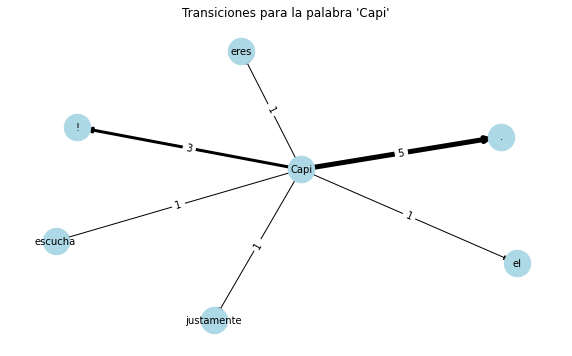

In [207]:
markov_predictor.visualize_transitions("Capi")

## n-gramas

In [208]:
import re
import random
from collections import defaultdict

class NgramModel:
    def __init__(self, n):
        self.n = n
        self.ngram_counts = defaultdict(lambda: defaultdict(int))
    
    def train(self, text):
        """
        Entrena el modelo de n-gramas usando un texto dado.
        
        :param text: Cadena con el texto de entrenamiento.
        """
        words = re.findall(r'\w+', text.lower())
        for i in range(len(words) - self.n + 1):
            ngram = tuple(words[i:i + self.n - 1])
            next_word = words[i + self.n - 1]
            self.ngram_counts[ngram][next_word] += 1

    def generate_text(self, start_words, max_length=50):
        """
        Genera una secuencia de palabras basada en el modelo de n-gramas.
        
        :param start_words: Lista de palabras iniciales (debe tener longitud n-1).
        :param max_length: Número máximo de palabras a generar.
        :return: Una cadena con la secuencia generada.
        """
        current_context = tuple(start_words)
        output = list(current_context)

        for _ in range(max_length):
            next_word = self.predict_next_word(current_context)
            if not next_word:
                break
            output.append(next_word)
            current_context = tuple(output[-(self.n - 1):])

        return " ".join(output)
    def predict_next_word(self, context):
        """
        Predice la siguiente palabra basándose en el contexto de n-1 palabras.
        
        :param context: Tupla de n-1 palabras.
        :return: La siguiente palabra elegida probabilísticamente o None si no hay datos.
        """
        next_word_candidates = self.ngram_counts.get(context, None)
        if not next_word_candidates:
            return None

        words, counts = zip(*next_word_candidates.items())
        probabilities = [count / sum(counts) for count in counts]
        return random.choices(words, probabilities)[0]


In [209]:
with open("metegol_limpio.txt", "r", encoding="utf-8") as file:
    texto_entrenamiento = file.read()

In [210]:
ngram_model = NgramModel(n=3)
ngram_model.train(texto_entrenamiento)

In [222]:
contexto = ("lo", "amadeo")
siguiente_palabra = ngram_model.predict_next_word(contexto)
print(f"Contexto: {contexto}")
print(f"Siguiente palabra: {siguiente_palabra}")


Contexto: ('lo', 'amadeo')
Siguiente palabra: None


In [220]:
oracion_generada = ngram_model.generate_text(["amadeo", "lo"], max_length=10)
print("Oración generada:", oracion_generada)

Oración generada: amadeo lo
